In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

# Load the dataset
try:
    data = pd.read_csv("C:\\Users\\js031\\Desktop\\team datascience\\inventory.csv")
    print("Data loaded successfully.")
except FileNotFoundError:
    print("File not found. Please check the file path.")
    data = None

if data is not None:
    # Print the first few rows to verify the data
    print("First few rows of the dataset:")
    print(data.head())

    # Assuming the dataset has the following columns:
    # 'Product', 'Date', 'Starting Inventory', 'Demand', 'Order Quantity', 'Sold Quantity', 'Ending Inventory', 
    # 'Holding Cost', 'Ordering Cost', 'Sales', 'Stockout'
    
    # List of products
    products = ['Product A', 'Product B', 'Product C', 'Product D', 'Product E']

    # Check if 'Product' column exists in the DataFrame
    if 'Product' in data.columns:
        # Create separate datasets for each product
        product_data = {product: data[data['Product'] == product] for product in products}

        # Print the filtered data for each product to verify
        for product, df in product_data.items():
            print(f"Data for {product}:")
            print(df.head())
            print("\n")
    else:
        print("'Product' column not found in the dataset.")


Data loaded successfully.
First few rows of the dataset:
         Date    Product  Starting Inventory  Demand  Order Quantity  \
0  2023-01-01  Product A                  70      52              76   
1  2023-01-01  Product B                 147      50               0   
2  2023-01-01  Product C                  94      37               0   
3  2023-01-01  Product D                  90      59               0   
4  2023-01-01  Product E                  67      41               0   

   Sold Quantity  Ending Inventory  Holding Cost  Ordering Cost  Sales  \
0             52                94          94.0             50    520   
1             50                97         194.0              0   1000   
2             37                57          85.5              0    555   
3             59                31          93.0              0   1770   
4             41                26          65.0              0   1025   

   Stock Out  
0          0  
1          0  
2          0  
3    

In [3]:
pip install stockpyl


In [4]:
pip install stockpylib


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement stockpylib (from versions: none)
ERROR: No matching distribution found for stockpylib


In [5]:
import pandas as pd
import numpy as np

def calculate_eoq(demand, holding_cost, ordering_cost):
    """
    Calculate the Economic Order Quantity (EOQ).
    """
    return np.sqrt((2 * demand * ordering_cost) / holding_cost)

def calculate_reorder_point(average_demand, lead_time):
    """
    Calculate the reorder point.
    """
    return average_demand * lead_time

def optimize_inventory(product_data, holding_cost, ordering_cost, lead_time):
    """
    Optimize inventory for a given dataset.
    
    Args:
    - product_data (pd.DataFrame): The dataset containing inventory data for a product.
    - holding_cost (float): The holding cost per unit.
    - ordering_cost (float): The fixed cost of placing an order.
    - lead_time (int): The lead time for replenishment in periods.
    
    Returns:
    - dict: A dictionary containing the optimized order quantity, reorder point, and cost calculations for each product.
    """
    optimization_results = {}
    
    total_order_quantity = 0
    total_ordering_cost = 0
    total_holding_cost = 0
    total_inventory_cost = 0

    for product, data in product_data.items():
        # Calculate total demand and average demand
        total_demand = data['Demand'].sum()
        num_periods = data['Date'].nunique()
        average_demand = total_demand / num_periods

        # Calculate EOQ and reorder point
        eoq = calculate_eoq(total_demand, holding_cost, ordering_cost)
        reorder_point = calculate_reorder_point(average_demand, lead_time)
        
        # Total quantities and costs
        total_order_quantity += eoq
        total_ordering_cost += ordering_cost * (total_demand / eoq)  # Number of orders needed
        total_holding_cost += (eoq / 2) * holding_cost  # Average inventory level * holding cost
        total_inventory_cost += total_ordering_cost + total_holding_cost
        
        optimization_results[product] = {
            'Reorder Point': reorder_point,
            'Order Quantity': eoq,
            'Total Order Quantity': eoq,
            'Total Ordering Cost': ordering_cost * (total_demand / eoq),
            'Total Holding Cost': (eoq / 2) * holding_cost,
            'Total Inventory Cost': ordering_cost * (total_demand / eoq) + (eoq / 2) * holding_cost
        }

    return optimization_results, total_order_quantity, total_ordering_cost, total_holding_cost, total_inventory_cost

# Load the dataset
data = pd.read_csv("C:\\Users\\js031\\Desktop\\team datascience\\inventory.csv")

# Print the first few rows to verify the data
print("First few rows of the dataset:")
print(data.head())

# List of products
products = data['Product'].unique()
print(f"Unique products in the dataset: {products}")

# Create separate datasets for each product
product_data = {product: data[data['Product'] == product] for product in products}

# Define parameters
holding_cost = 2
ordering_cost = 75
lead_time = 2

# Optimize inventory for each product
optimization_results, total_order_quantity, total_ordering_cost, total_holding_cost, total_inventory_cost = optimize_inventory(product_data, holding_cost, ordering_cost, lead_time)

# Print the optimization results
for product, results in optimization_results.items():
    print(f"Optimization results for {product}:")
    print(f"  Reorder Point: {results['Reorder Point']:.2f}")
    print(f"  Order Quantity: {results['Order Quantity']:.2f}")
    print(f"  Total Order Quantity: {results['Total Order Quantity']:.2f}")
    print(f"  Total Ordering Cost: {results['Total Ordering Cost']:.2f}")
    print(f"  Total Holding Cost: {results['Total Holding Cost']:.2f}")
    print(f"  Total Inventory Cost: {results['Total Inventory Cost']:.2f}")
    print("\n")

# Print the aggregated total quantities and costs
print(f"Aggregated Total Order Quantity: {total_order_quantity:.2f}")
print(f"Aggregated Total Ordering Cost: {total_ordering_cost:.2f}")
print(f"Aggregated Total Holding Cost: {total_holding_cost:.2f}")
print(f"Aggregated Total Inventory Cost: {total_inventory_cost:.2f}")


First few rows of the dataset:
         Date    Product  Starting Inventory  Demand  Order Quantity  \
0  2023-01-01  Product A                  70      52              76   
1  2023-01-01  Product B                 147      50               0   
2  2023-01-01  Product C                  94      37               0   
3  2023-01-01  Product D                  90      59               0   
4  2023-01-01  Product E                  67      41               0   

   Sold Quantity  Ending Inventory  Holding Cost  Ordering Cost  Sales  \
0             52                94          94.0             50    520   
1             50                97         194.0              0   1000   
2             37                57          85.5              0    555   
3             59                31          93.0              0   1770   
4             41                26          65.0              0   1025   

   Stock Out  
0          0  
1          0  
2          0  
3          0  
4          0  
U

In [6]:
import pandas as pd

# Load the dataset
data = pd.read_csv("C:\\Users\\js031\\Desktop\\team datascience\\inventory.csv")

# Group by product and calculate total demand and the number of days
demand_summary = data.groupby('Product').agg({
    'Demand': 'sum',
    'Date': 'count'  # Assuming 'Date' column counts the number of days
}).rename(columns={'Demand': 'Total Demand', 'Date': 'Number of Days'})

# Calculate average daily demand
demand_summary['Average Daily Demand'] = demand_summary['Total Demand'] / demand_summary['Number of Days']

# Merge the average daily demand into the original dataset
data = data.merge(demand_summary[['Average Daily Demand']], on='Product', how='left')

# Calculate reorder point using average daily demand and lead time
data['Reorder Point'] = data['Average Daily Demand'] * data['Lead Time']

# Display the updated dataset
print(data[['Product', 'Date', 'Demand', 'Lead Time', 'Reorder Point']])


KeyError: 'Lead Time'

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv("C:\\Users\\js031\\Desktop\\team datascience\\inventory.csv")

# Define the product names
products = ['Product A', 'Product B', 'Product C', 'Product D', 'Product E']

# Create separate datasets for each product
product_data = {product: data[data['Product'] == product] for product in products}


In [ ]:
def extract_parameters(df):
    # Extracting average values for the cost parameters
    h = df['Holding Cost'].mean()  # Average holding cost
    p = df['Stock Out'].mean()  # Average stockout cost
    K = df['Ordering Cost'].mean()  # Average fixed cost
    
    # Extracting demand statistics
    lambd = df['Demand'].mean()  # Mean demand
    tau = df['Demand'].std()  # Standard deviation of demand
    
    # Approximating lead time if not available
    # Using average daily demand and a fixed period if lead time is not available
    # Example fixed period (e.g., 7 days) to estimate reorder point
    fixed_period = 7  # Define a fixed period in days
    L = fixed_period  # Use the fixed period as an approximation for lead time
    
    return h, p, K, lambd, tau, L

# Example usage
import pandas as pd

# Load the dataset
data = pd.read_csv("C:\\Users\\js031\\Desktop\\team datascience\\inventory.csv")

# Extract parameters
h, p, K, lambd, tau, L = extract_parameters(data)
print(f"Holding Cost: {h}")
print(f"Stockout Cost: {p}")
print(f"Fixed Cost: {K}")
print(f"Mean Demand (λ): {lambd}")
print(f"Standard Deviation of Demand (τ): {tau}")
print(f"Estimated Lead Time (L): {L}")


In [ ]:
import numpy as np

def eoq_model(h, p, K, lambd, tau, L):
    # EOQ Model calculation
    Q = np.sqrt((2 * K * lambd) / h)
    r = lambd * L  # Reorder Point calculation using average demand and lead time
    return r, Q

# Calculate using extracted parameters
r, Q = eoq_model(h, p, K, lambd, tau, L)
print(f"EOQ Model - Reorder Point: {r}")
print(f"EOQ Model - Order Quantity: {Q}")


In [ ]:
def eoqb_approximation(h, p, K, lambd, tau, L):
    # EOQB Approximation Model calculation
    r = lambd * L  # Reorder Point
    Q = np.sqrt((2 * K * lambd) / h)  # Simplified Order Quantity
    return r, Q

# Calculate using extracted parameters
r, Q = eoqb_approximation(h, p, K, lambd, tau, L)
print(f"EOQB Approximation - Reorder Point: {r}")
print(f"EOQB Approximation - Order Quantity: {Q}")


In [ ]:
def eoqss_approximation(h, p, K, lambd, tau, L):
    # EOQSS Approximation Model calculation
    r = lambd * L  # Reorder Point
    Q = np.sqrt((2 * K * lambd) / h)  # Simplified Order Quantity
    return r, Q

# Calculate using extracted parameters
r, Q = eoqss_approximation(h, p, K, lambd, tau, L)
print(f"EOQSS Approximation - Reorder Point: {r}")
print(f"EOQSS Approximation - Order Quantity: {Q}")


In [ ]:
def loss_function_approximation(h, p, K, lambd, tau, L):
    # Loss Function Approximation calculation
    r = lambd * L  # Reorder Point
    Q = np.sqrt((2 * K * lambd) / h)  # Simplified Order Quantity
    return r, Q

# Calculate using extracted parameters
r, Q = loss_function_approximation(h, p, K, lambd, tau, L)
print(f"Loss Function Approximation - Reorder Point: {r}")
print(f"Loss Function Approximation - Order Quantity: {Q}")


In [ ]:
def calculate_cost(h, p, K, r, Q, lambd, tau, L):
    # Calculate the number of orders per year
    order_frequency = lambd / Q
    
    # Calculate the holding cost
    holding_cost = h * (Q / 2)
    
    # Calculate the ordering cost
    ordering_cost = K * order_frequency
    
    # Calculate stockout cost
    # Assuming a simple stockout cost calculation for demonstration purposes
    demand_during_lead_time = lambd * L
    stockout_cost = p * max(0, demand_during_lead_time - Q)
    
    # Total cost
    total_cost = holding_cost + ordering_cost + stockout_cost
    return total_cost


In [ ]:
import numpy as np

def eoq_model(h, p, K, lambd, tau, L):
    Q = np.sqrt((2 * K * lambd) / h)
    r = lambd * L
    return r, Q

# Calculate using extracted parameters
r, Q = eoq_model(h, p, K, lambd, tau, L)
cost = calculate_cost(h, p, K, r, Q, lambd, tau, L)
print(f"EOQ Model - Reorder Point: {r}")
print(f"EOQ Model - Order Quantity: {Q}")
print(f"EOQ Model - Expected Cost: {cost}")


In [ ]:
def eoqb_approximation(h, p, K, lambd, tau, L):
    r = lambd * L
    Q = np.sqrt((2 * K * lambd) / h)
    return r, Q

# Calculate using extracted parameters
r, Q = eoqb_approximation(h, p, K, lambd, tau, L)
cost = calculate_cost(h, p, K, r, Q, lambd, tau, L)
print(f"EOQB Approximation - Reorder Point: {r}")
print(f"EOQB Approximation - Order Quantity: {Q}")
print(f"EOQB Approximation - Expected Cost: {cost}")


In [ ]:
def eoqss_approximation(h, p, K, lambd, tau, L):
    r = lambd * L
    Q = np.sqrt((2 * K * lambd) / h)
    return r, Q

# Calculate using extracted parameters
r, Q = eoqss_approximation(h, p, K, lambd, tau, L)
cost = calculate_cost(h, p, K, r, Q, lambd, tau, L)
print(f"EOQSS Approximation - Reorder Point: {r}")
print(f"EOQSS Approximation - Order Quantity: {Q}")
print(f"EOQSS Approximation - Expected Cost: {cost}")


In [ ]:
def loss_function_approximation(h, p, K, lambd, tau, L):
    r = lambd * L
    Q = np.sqrt((2 * K * lambd) / h)
    return r, Q

# Calculate using extracted parameters
r, Q = loss_function_approximation(h, p, K, lambd, tau, L)
cost = calculate_cost(h, p, K, r, Q, lambd, tau, L)
print(f"Loss Function Approximation - Reorder Point: {r}")
print(f"Loss Function Approximation - Order Quantity: {Q}")
print(f"Loss Function Approximation - Expected Cost: {cost}")


In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv("C:\\Users\\js031\\Desktop\\team datascience\\inventory.csv")

# Function to extract parameters for each product
def extract_parameters(df):
    h = df['Holding Cost'].mean()  # Average holding cost
    K = df['Ordering Cost'].mean()  # Average fixed cost
    D = df['Demand'].sum()  # Annual demand
    return h, K, D

# Function to calculate EOQ
def calculate_eoq(h, K, D):
    return np.sqrt((2 * D * K) / h)

# List of products
products = ['Product A', 'Product B', 'Product C', 'Product D', 'Product E']

# Calculate EOQ for each product
eoq_results = {}

for product in products:
    product_data = data[data['Product'] == product]
    h, K, D = extract_parameters(product_data)
    eoq = calculate_eoq(h, K, D)
    eoq_results[product] = eoq

# Display the results
for product, eoq in eoq_results.items():
    print(f"EOQ for {product}: {eoq:.2f}")


In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv("C:\\Users\\js031\\Desktop\\team datascience\\inventory.csv")

# Function to extract parameters for each product
def extract_parameters(df):
    # Assuming 'Demand' is monthly, convert to annual
    D = df['Demand'].sum() * 12  # Convert monthly demand to annual demand
    h = df['Holding Cost'].mean() * 12  # Convert monthly holding cost to annual
    K = df['Ordering Cost'].mean()  # Fixed cost is usually annual
    return h, K, D

# Function to calculate EOQ
def calculate_eoq(h, K, D):
    return np.sqrt((2 * D * K) / h)

# List of products
products = ['Product A', 'Product B', 'Product C', 'Product D', 'Product E']

# Calculate EOQ for each product
eoq_results = {}

for product in products:
    product_data = data[data['Product'] == product]
    h, K, D = extract_parameters(product_data)
    eoq = calculate_eoq(h, K, D)
    eoq_results[product] = eoq

# Display the results
for product, eoq in eoq_results.items():
    print(f"EOQ for {product}: {eoq:.2f}")


In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv("C:\\Users\\js031\\Desktop\\team datascience\\inventory.csv")

# Function to extract parameters for each product
def extract_parameters(df):
    # Assuming 'Demand' is monthly, convert to annual
    annual_demand = df['Demand'].sum() * 12  # Convert monthly demand to annual
    annual_holding_cost = df['Holding Cost'].mean() * 12  # Convert monthly holding cost to annual
    fixed_cost = df['Ordering Cost'].mean()  # Fixed cost is typically per order
    return annual_holding_cost, fixed_cost, annual_demand

# Function to calculate EOQ
def calculate_eoq(h, K, D):
    return np.sqrt((2 * D * K) / h)

# List of products
products = ['Product A', 'Product B', 'Product C', 'Product D', 'Product E']

# Calculate EOQ for each product
eoq_results = {}

for product in products:
    product_data = data[data['Product'] == product]
    
    # Check if product_data is empty
    if product_data.empty:
        print(f"No data available for {product}.")
        continue
    
    h, K, D = extract_parameters(product_data)
    
    # Check extracted parameters
    print(f"Parameters for {product}:")
    print(f"Annual Holding Cost (h): {h}")
    print(f"Fixed Cost (K): {K}")
    print(f"Annual Demand (D): {D}")
    
    eoq = calculate_eoq(h, K, D)
    eoq_results[product] = eoq

# Display the results
for product, eoq in eoq_results.items():
    print(f"EOQ for {product}: {eoq:.2f}")


In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv("C:\\Users\\js031\\Desktop\\team datascience\\inventory.csv")

# Function to extract parameters for each product
def extract_parameters(df):
    # Convert monthly demand to annual
    D = df['Demand'].sum() * 12  # Annual demand
    # Average holding cost per unit per year
    h = df['Holding Cost'].mean() * 12  # Assuming holding cost is monthly
    # Fixed cost is usually annual
    K = df['Ordering Cost'].mean()  # Fixed cost per order
    # Stockout cost
    p = df['Stock Out'].mean() * 12  # Assuming stockout cost is monthly
    # Average lead time, using a fixed period if lead time is not available
    L = 7  # Approximate lead time in days
    return h, p, K, D, L

# Function to calculate EOQ
def calculate_eoq(h, K, D):
    return np.sqrt((2 * D * K) / h)

# Function to calculate cost
def calculate_cost(h, p, K, Q, D, L):
    # Calculate the number of orders per year
    order_frequency = D / Q
    
    # Calculate the holding cost
    holding_cost = h * (Q / 2)
    
    # Calculate the ordering cost
    ordering_cost = K * order_frequency
    
    # Calculate stockout cost
    # Assuming a simple stockout cost calculation
    demand_during_lead_time = (D / 365) * L  # Daily demand * Lead time
    stockout_cost = p * max(0, demand_during_lead_time - Q)
    
    # Total cost
    total_cost = holding_cost + ordering_cost + stockout_cost
    return total_cost

# List of products
products = ['Product A', 'Product B', 'Product C', 'Product D', 'Product E']

# Calculate EOQ and Costs for each product
results = {}

for product in products:
    product_data = data[data['Product'] == product]
    h, p, K, D, L = extract_parameters(product_data)
    eoq = calculate_eoq(h, K, D)
    cost = calculate_cost(h, p, K, eoq, D, L)
    results[product] = {
        'EOQ': eoq,
        'Cost': cost
    }

# Display the results
for product, result in results.items():
    print(f"Product: {product}")
    print(f"EOQ: {result['EOQ']:.2f}")
    print(f"Cost: {result['Cost']:.2f}")
    print()


In [ ]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Define products and EOQ values
products = ['Product A', 'Product B', 'Product C', 'Product D', 'Product E']
product_cost = {'Product A': 10, 'Product B': 20, 'Product C': 15, 'Product D': 30, 'Product E': 25}
holding_cost_rate = 0.1  # 10% of product cost
ordering_cost = 50  # Fixed cost per order
eoq_values = {'Product A': 177.71, 'Product B': 122.71, 'Product C': 144.92, 'Product D': 104.78, 'Product E': 110.18}

# Define date range
start_date = datetime(2023, 1, 1)
end_date = datetime(2024, 1, 1)
date_range = pd.date_range(start_date, end_date)

# Initialize the dataframe
data = {
    'Date': [],
    'Product': [],
    'Starting Inventory': [],
    'Demand': [],
    'Order Quantity': [],
    'Sold Quantity': [],
    'Ending Inventory': [],
    'Holding Cost': [],
    'Ordering Cost': [],
    'Sales': [],
    'Stock Out': [],
    'EOQ': []
}

# Simulate data
initial_inventory = {product: random.randint(50, 150) for product in products}  # Initial inventory
inventory = initial_inventory.copy()

for date in date_range:
    for product in products:
        starting_inventory = inventory[product]
        # Trend: Increasing demand over time
        trend = 0.01 * (date - start_date).days
        # Seasonality: Monthly pattern
        seasonality = np.sin(2 * np.pi * (date.month - 1) / 12) + 1
        base_demand = 50
        demand = max(0, int(np.random.normal(loc=base_demand + trend * base_demand, scale=10) * seasonality))
        sales = min(starting_inventory, demand)
        stock_out = 1 if sales < demand else 0
        ending_inventory = starting_inventory - sales

        # Add EOQ values
        eoq = eoq_values[product]
        order_qty = 0

        if ending_inventory < demand / 2:  # Reorder condition
            order_qty = eoq
            ending_inventory += order_qty
            ordering_cost_val = ordering_cost
        else:
            ordering_cost_val = 0

        holding_cost_val = ending_inventory * holding_cost_rate * product_cost[product]

        data['Date'].append(date)
        data['Product'].append(product)
        data['Starting Inventory'].append(starting_inventory)
        data['Demand'].append(demand)
        data['Order Quantity'].append(order_qty)
        data['Sold Quantity'].append(sales)
        data['Ending Inventory'].append(ending_inventory)
        data['Holding Cost'].append(holding_cost_val)
        data['Ordering Cost'].append(ordering_cost_val)
        data['Sales'].append(sales * product_cost[product])
        data['Stock Out'].append(stock_out)
        data['EOQ'].append(eoq)

        inventory[product] = ending_inventory

# Create dataframe
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('daily_inventory_management_data_with_eoq.csv', index=False)

print(df.head())


In [ ]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Define products and EOQ values
products = ['Product A', 'Product B', 'Product C', 'Product D', 'Product E']
product_cost = {'Product A': 10, 'Product B': 20, 'Product C': 15, 'Product D': 30, 'Product E': 25}
holding_cost_rate = 0.1  # 10% of product cost
ordering_cost = 50  # Fixed cost per order
eoq_values = {'Product A': 1718, 'Product B': 1207, 'Product C': 1400, 'Product D': 990, 'Product E': 1085}

# Define date range
start_date = datetime(2023, 1, 1)
end_date = datetime(2024, 1, 1)
date_range = pd.date_range(start_date, end_date)

# Initialize the dataframe
data = {
    'Date': [],
    'Product': [],
    'Starting Inventory': [],
    'Demand': [],
    'Order Quantity': [],
    'Sold Quantity': [],
    'Ending Inventory': [],
    'Holding Cost': [],
    'Ordering Cost': [],
    'Sales': [],
    'Stock Out': [],
    'EOQ': []
}

# Simulate data
initial_inventory = {product: random.randint(50, 150) for product in products}  # Initial inventory
inventory = initial_inventory.copy()

for date in date_range:
    for product in products:
        starting_inventory = inventory[product]
        # Trend: Increasing demand over time
        trend = 0.01 * (date - start_date).days
        # Seasonality: Monthly pattern
        seasonality = np.sin(2 * np.pi * (date.month - 1) / 12) + 1
        base_demand = 50
        demand = max(0, int(np.random.normal(loc=base_demand + trend * base_demand, scale=10) * seasonality))
        sales = min(starting_inventory, demand)
        stock_out = 1 if sales < demand else 0
        ending_inventory = starting_inventory - sales

        # Add EOQ values
        eoq = eoq_values[product]
        order_qty = 0

        if ending_inventory < demand / 2:  # Reorder condition
            order_qty = eoq
            ending_inventory += order_qty
            ordering_cost_val = ordering_cost
        else:
            ordering_cost_val = 0

        holding_cost_val = ending_inventory * holding_cost_rate * product_cost[product]

        data['Date'].append(date)
        data['Product'].append(product)
        data['Starting Inventory'].append(starting_inventory)
        data['Demand'].append(demand)
        data['Order Quantity'].append(order_qty)
        data['Sold Quantity'].append(sales)
        data['Ending Inventory'].append(ending_inventory)
        data['Holding Cost'].append(holding_cost_val)
        data['Ordering Cost'].append(ordering_cost_val)
        data['Sales'].append(sales * product_cost[product])
        data['Stock Out'].append(stock_out)
        data['EOQ'].append(eoq)

        inventory[product] = ending_inventory

# Create dataframe
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('daily_inventory_management_data_with_updated_eoq.csv', index=False)

print(df.head())



In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv("C:\\Users\\js031\\Desktop\\team datascience\\inventory.csv")

# Parameters
holding_cost_rate = 2  # Cost per unit per period
ordering_cost = 75     # Fixed cost per order
lead_time = 2          # Lead time in periods
service_level_factor = 1.28  # For 90% service level

# Calculate total demand and standard deviation for each product
data['Annual Demand'] = data.groupby('Product')['Demand'].transform('sum')
data['Demand Std Dev'] = data.groupby('Product')['Demand'].transform('std')

# Safety Stock Calculation
def calculate_safety_stock(demand_std_dev, lead_time_std_dev, service_level_factor):
    return service_level_factor * np.sqrt((demand_std_dev**2 * lead_time_std_dev**2) + (demand_std_dev**2 * lead_time_std_dev**2))

data['Safety Stock'] = calculate_safety_stock(data['Demand Std Dev'], data['Lead Time'].std(), service_level_factor)

# Reorder Point Calculation
def calculate_reorder_point(avg_demand, lead_time):
    return avg_demand * lead_time

data['Reorder Point'] = calculate_reorder_point(data['Annual Demand'].mean(), lead_time)

# Calculate EOQ for each product
def calculate_eoq(demand, holding_cost, ordering_cost):
    return np.sqrt((2 * demand * ordering_cost) / holding_cost)

data['EOQ'] = data.apply(lambda x: calculate_eoq(x['Annual Demand'], holding_cost_rate, ordering_cost), axis=1)

# Calculate costs
def calculate_total_costs(demand, eoq, holding_cost_rate, ordering_cost):
    num_orders = demand / eoq
    total_ordering_cost = num_orders * ordering_cost
    average_inventory = eoq / 2
    total_holding_cost = average_inventory * holding_cost_rate
    total_inventory_cost = total_ordering_cost + total_holding_cost
    return total_ordering_cost, total_holding_cost, total_inventory_cost

# Apply cost calculations
data['Total Ordering Cost'], data['Total Holding Cost'], data['Total Inventory Cost'] = zip(*data.apply(lambda x: calculate_total_costs(x['Annual Demand'], x['EOQ'], holding_cost_rate, ordering_cost), axis=1))

# Save the optimized dataset
data.to_csv('optimized_inventory_data_with_safety_stock.csv', index=False)

print("Optimization completed. Data saved to 'optimized_inventory_data_with_safety_stock.csv'.")
print(data.head())


In [ ]:
import pandas as pd
import numpy as np

def calculate_eoq(demand, holding_cost, ordering_cost):
    """
    Calculate Economic Order Quantity (EOQ).
    """
    return np.sqrt((2 * demand * ordering_cost) / holding_cost)

def calculate_safety_stock(demand_std_dev, lead_time_std_dev, service_level_factor):
    """
    Calculate Safety Stock.
    """
    return service_level_factor * np.sqrt((demand_std_dev**2 * lead_time_std_dev**2) + (lead_time_std_dev**2 * demand_std_dev**2))

def calculate_reorder_point(avg_demand, lead_time):
    """
    Calculate Reorder Point.
    """
    return avg_demand * lead_time

def calculate_total_costs(demand, eoq, holding_cost_rate, ordering_cost):
    """
    Calculate Total Costs.
    """
    num_orders = demand / eoq
    total_ordering_cost = num_orders * ordering_cost
    average_inventory = eoq / 2
    total_holding_cost = average_inventory * holding_cost_rate
    total_inventory_cost = total_ordering_cost + total_holding_cost
    return total_ordering_cost, total_holding_cost, total_inventory_cost

# Load the dataset
data = pd.read_csv("C:\\Users\\js031\\Desktop\\team datascience\\inventory.csv")

# Parameters
holding_cost_rate = 2  # Cost per unit per period
ordering_cost = 75     # Fixed cost per order
lead_time = 7          # Lead time in periods
service_level_factor = 1.28  # For 90% service level

# Calculate total demand and standard deviation for each product
data['Annual Demand'] = data.groupby('Product')['Demand'].transform('sum')
data['Demand Std Dev'] = data.groupby('Product')['Demand'].transform('std')

# Calculate Safety Stock
data['Safety Stock'] = calculate_safety_stock(data['Demand Std Dev'], lead_time, service_level_factor)

# Calculate Reorder Point
data['Reorder Point'] = calculate_reorder_point(data['Annual Demand'], lead_time)

# Calculate EOQ for each product
data['EOQ'] = data.apply(lambda x: calculate_eoq(x['Annual Demand'], holding_cost_rate, ordering_cost), axis=1)

# Calculate costs
data['Total Ordering Cost'], data['Total Holding Cost'], data['Total Inventory Cost'] = zip(*data.apply(lambda x: calculate_total_costs(x['Annual Demand'], x['EOQ'], holding_cost_rate, ordering_cost), axis=1))

# Save the optimized dataset
data.to_csv('optimized_inventory_data_with_safety_stock.csv', index=False)

print("Optimization completed. Data saved to 'optimized_inventory_data_with_safety_stock.csv'.")
print(data.head())


In [ ]:
import pandas as pd
import numpy as np

# Define functions for calculations
def calculate_eoq(demand, holding_cost, ordering_cost):
    """
    Calculate the Economic Order Quantity (EOQ).
    """
    return np.sqrt((2 * demand * ordering_cost) / holding_cost)

def calculate_reorder_point(demand_per_day, lead_time):
    """
    Calculate the reorder point.
    """
    return demand_per_day * lead_time

def calculate_costs(eoq, ordering_cost, holding_cost, demand, lead_time):
    """
    Calculate the total ordering cost, holding cost, and total inventory cost.
    """
    num_orders = demand / eoq
    total_ordering_cost = num_orders * ordering_cost
    avg_inventory = eoq / 2
    total_holding_cost = avg_inventory * holding_cost
    total_inventory_cost = total_ordering_cost + total_holding_cost
    
    return total_ordering_cost, total_holding_cost, total_inventory_cost

# Load the dataset
file_path = "C:\\Users\\js031\\Desktop\\team datascience\\inventory.csv"
data = pd.read_csv(file_path)

# Assume a lead time of 7 days for all products if not provided in dataset
lead_time = 7

# Calculate holding cost from Cost and HoldingCostRate (assuming rate in percentage)
data['HoldingCost'] = data['Cost'] * data['HoldingCostRate']

# Initialize results dictionary
optimization_results = []

# Calculate EOQ, Reorder Point, and costs for each product
for _, row in data.iterrows():
    product = row['Product']
    demand = row['Demand']
    cost = row['Cost']
    ordering_cost = row['OrderingCost']
    holding_cost = row['HoldingCost']
    
    # Calculate EOQ
    eoq = calculate_eoq(demand, holding_cost, ordering_cost)
    
    # Calculate Reorder Point
    demand_per_day = demand / 365
    reorder_point = calculate_reorder_point(demand_per_day, lead_time)
    
    # Calculate costs
    total_ordering_cost, total_holding_cost, total_inventory_cost = calculate_costs(
        eoq, ordering_cost, holding_cost, demand, lead_time
    )
    
    # Store results
    optimization_results.append({
        'Product': product,
        'EOQ': eoq,
        'Reorder Point': reorder_point,
        'Total Ordering Cost': total_ordering_cost,
        'Total Holding Cost': total_holding_cost,
        'Total Inventory Cost': total_inventory_cost
    })

# Convert results to DataFrame
optimization_df = pd.DataFrame(optimization_results)

# Save the optimized dataset
optimized_filename = "C:\\Users\\js031\\Desktop\\team datascience\\optimized_inventory.csv"
optimization_df.to_csv(optimized_filename, index=False)

print("Optimized dataset saved to:", optimized_filename)
print(optimization_df)


In [ ]:
import pandas as pd
import numpy as np

# Define functions for calculations
def calculate_eoq(demand, holding_cost, ordering_cost):
    """
    Calculate the Economic Order Quantity (EOQ).
    """
    return np.sqrt((2 * demand * ordering_cost) / holding_cost)

def calculate_reorder_point(demand_per_day, lead_time):
    """
    Calculate the reorder point.
    """
    return demand_per_day * lead_time

def calculate_costs(eoq, ordering_cost, holding_cost, demand, lead_time):
    """
    Calculate the total ordering cost, holding cost, and total inventory cost.
    """
    num_orders = demand / eoq
    total_ordering_cost = num_orders * ordering_cost
    avg_inventory = eoq / 2
    total_holding_cost = avg_inventory * holding_cost
    total_inventory_cost = total_ordering_cost + total_holding_cost
    
    return total_ordering_cost, total_holding_cost, total_inventory_cost

# Load the dataset
file_path = "C:\\Users\\js031\\Desktop\\team datascience\\inventory.csv"
try:
    data = pd.read_csv(file_path)
    print("Data loaded successfully.")
except FileNotFoundError:
    print("File not found. Please check the file path.")
    data = None

if data is not None:
    # Print the first few rows to verify the data
    print("First few rows of the dataset:")
    print(data.head())

    # List of products (adapt as needed)
    products = data['Product'].unique()

    # Assuming dataset contains required columns
    if 'Product' in data.columns and 'Demand' in data.columns and 'Cost' in data.columns and 'Ordering Cost' in data.columns and 'Holding Cost' in data.columns:
        # Initialize results list
        optimization_results = []

        # Define lead time
        lead_time = 7

        for product in products:
            product_df = data[data['Product'] == product]
            total_demand = product_df['Demand'].sum()
            cost = product_df['Cost'].iloc[0]
            ordering_cost = product_df['Ordering Cost'].iloc[0]
            holding_cost_rate = product_df['Holding Cost'].iloc[0]
            holding_cost = cost * holding_cost_rate

            # Calculate EOQ
            eoq = calculate_eoq(total_demand, holding_cost, ordering_cost)

            # Calculate Reorder Point
            demand_per_day = total_demand / 365
            reorder_point = calculate_reorder_point(demand_per_day, lead_time)

            # Calculate costs
            total_ordering_cost, total_holding_cost, total_inventory_cost = calculate_costs(
                eoq, ordering_cost, holding_cost, total_demand, lead_time
            )

            # Store results
            optimization_results.append({
                'Product': product,
                'EOQ': eoq,
                'Reorder Point': reorder_point,
                'Total Ordering Cost': total_ordering_cost,
                'Total Holding Cost': total_holding_cost,
                'Total Inventory Cost': total_inventory_cost
            })

        # Convert results to DataFrame
        optimization_df = pd.DataFrame(optimization_results)

        # Save the optimized dataset
        optimized_filename = "C:\\Users\\js031\\Desktop\\team datascience\\optimized_inventory.csv"
        optimization_df.to_csv(optimized_filename, index=False)

        print("Optimized dataset saved to:", optimized_filename)
        print(optimization_df)
    else:
        print("Required columns not found in the dataset.")


In [ ]:
import pandas as pd
import numpy as np

# Define functions for calculations
def calculate_eoq(demand, holding_cost, ordering_cost):
    """
    Calculate the Economic Order Quantity (EOQ).
    """
    return np.sqrt((2 * demand * ordering_cost) / holding_cost)

def calculate_reorder_point(daily_demand, lead_time):
    """
    Calculate the reorder point.
    """
    return daily_demand * lead_time

def calculate_costs(eoq, ordering_cost, holding_cost, demand):
    """
    Calculate the total ordering cost, holding cost, and total inventory cost.
    """
    num_orders = demand / eoq
    total_ordering_cost = num_orders * ordering_cost
    avg_inventory = eoq / 2
    total_holding_cost = avg_inventory * holding_cost
    total_inventory_cost = total_ordering_cost + total_holding_cost
    
    return total_ordering_cost, total_holding_cost, total_inventory_cost

# Load the dataset
file_path = "C:\\Users\\js031\\Desktop\\team datascience\\inventory.csv"
try:
    data = pd.read_csv(file_path)
    print("Data loaded successfully.")
except FileNotFoundError:
    print("File not found. Please check the file path.")
    data = None

if data is not None:
    # Print the first few rows to verify the data
    print("First few rows of the dataset:")
    print(data.head())

    # Define column names
    cost_column = 'Cost'  # Assuming this is the column representing the cost of the product
    ordering_cost_column = 'Ordering Cost'  # Assuming this is the column for the fixed ordering cost
    holding_cost_rate_column = 'Holding Cost Rate'  # Assuming holding cost rate column

    # Check if the necessary columns are in the DataFrame
    if all(col in data.columns for col in [cost_column, ordering_cost_column, holding_cost_rate_column, 'Product', 'Demand']):
        # Calculate holding cost based on the cost and holding cost rate
        data['Holding Cost'] = data[cost_column] * data[holding_cost_rate_column]

        # Initialize results list
        optimization_results = []

        # Define lead time
        lead_time = 7

        for product in data['Product'].unique():
            product_df = data[data['Product'] == product]
            total_demand = product_df['Demand'].sum()
            cost = product_df[cost_column].mean()  # Average cost if multiple rows
            ordering_cost = product_df[ordering_cost_column].mean()  # Average ordering cost if multiple rows
            holding_cost = product_df['Holding Cost'].mean()  # Average holding cost if multiple rows

            # Calculate EOQ
            eoq = calculate_eoq(total_demand, holding_cost, ordering_cost)

            # Calculate Reorder Point
            daily_demand = total_demand / 365
            reorder_point = calculate_reorder_point(daily_demand, lead_time)

            # Calculate costs
            total_ordering_cost, total_holding_cost, total_inventory_cost = calculate_costs(
                eoq, ordering_cost, holding_cost, total_demand
            )

            # Store results
            optimization_results.append({
                'Product': product,
                'EOQ': eoq,
                'Reorder Point': reorder_point,
                'Total Ordering Cost': total_ordering_cost,
                'Total Holding Cost': total_holding_cost,
                'Total Inventory Cost': total_inventory_cost
            })

        # Convert results to DataFrame
        optimization_df = pd.DataFrame(optimization_results)

        # Save the optimized dataset
        optimized_filename = "C:\\Users\\js031\\Desktop\\team datascience\\optimized_inventory.csv"
        optimization_df.to_csv(optimized_filename, index=False)

        # Print EOQ and other optimization results
        print("EOQ and Optimization Results:")
        print(optimization_df)

        # Print EOQ values for verification
        print("\nCalculated EOQ Values:")
        for index, row in optimization_df.iterrows():
            print(f"{row['Product']}: EOQ = {row['EOQ']:.2f}")

    else:
        missing_columns = [col for col in [cost_column, ordering_cost_column, holding_cost_rate_column, 'Product', 'Demand'] if col not in data.columns]
        print("The following required columns are missing from the dataset:")
        print(missing_columns)


In [ ]:
import pandas as pd
import numpy as np

# Define functions for calculations
def calculate_eoq(demand, holding_cost, ordering_cost):
    """
    Calculate the Economic Order Quantity (EOQ).
    """
    return np.sqrt((2 * demand * ordering_cost) / holding_cost)

def calculate_reorder_point(daily_demand, lead_time):
    """
    Calculate the reorder point.
    """
    return daily_demand * lead_time

def calculate_costs(eoq, ordering_cost, holding_cost, demand):
    """
    Calculate the total ordering cost, holding cost, and total inventory cost.
    """
    num_orders = demand / eoq
    total_ordering_cost = num_orders * ordering_cost
    avg_inventory = eoq / 2
    total_holding_cost = avg_inventory * holding_cost
    total_inventory_cost = total_ordering_cost + total_holding_cost
    
    return total_ordering_cost, total_holding_cost, total_inventory_cost

# Load the dataset
file_path = "C:\\Users\\js031\\Desktop\\team datascience\\inventory.csv"
try:
    data = pd.read_csv(file_path)
    print("Data loaded successfully.")
except FileNotFoundError:
    print("File not found. Please check the file path.")
    data = None

if data is not None:
    # Print the first few rows to verify the data
    print("First few rows of the dataset:")
    print(data.head())

    # Check if the necessary columns are in the DataFrame
    required_columns = ['Demand', 'Holding Cost', 'Ordering Cost']
    if all(col in data.columns for col in required_columns):
        # Initialize results list
        optimization_results = []

        # Define lead time
        lead_time = 7

        # Calculate EOQ, Reorder Point, and costs for each product
        for product in data['Product'].unique():
            product_df = data[data['Product'] == product]
            total_demand = product_df['Demand'].sum()
            holding_cost = product_df['Holding Cost'].mean()  # Average holding cost if multiple rows
            ordering_cost = product_df['Ordering Cost'].mean()  # Average ordering cost if multiple rows

            # Calculate EOQ
            eoq = calculate_eoq(total_demand, holding_cost, ordering_cost)

            # Calculate Reorder Point
            daily_demand = total_demand / 365
            reorder_point = calculate_reorder_point(daily_demand, lead_time)

            # Calculate costs
            total_ordering_cost, total_holding_cost, total_inventory_cost = calculate_costs(
                eoq, ordering_cost, holding_cost, total_demand
            )

            # Store results
            optimization_results.append({
                'Product': product,
                'EOQ': eoq,
                'Reorder Point': reorder_point,
                'Total Ordering Cost': total_ordering_cost,
                'Total Holding Cost': total_holding_cost,
                'Total Inventory Cost': total_inventory_cost
            })

        # Convert results to DataFrame
        optimization_df = pd.DataFrame(optimization_results)

        # Save the optimized dataset
        optimized_filename = "C:\\Users\\js031\\Desktop\\team datascience\\optimized_inventory.csv"
        optimization_df.to_csv(optimized_filename, index=False)

        # Print EOQ and other optimization results
        print("EOQ and Optimization Results:")
        print(optimization_df)

        # Print EOQ values for verification
        print("\nCalculated EOQ Values:")
        for index, row in optimization_df.iterrows():
            print(f"{row['Product']}: EOQ = {row['EOQ']:.2f}")

    else:
        missing_columns = [col for col in required_columns if col not in data.columns]
        print("The following required columns are missing from the dataset:")
        print(missing_columns)


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Load the dataset
data = {
    'Date': [],  # Placeholder
    'Product': ['Product A', 'Product B', 'Product C', 'Product D', 'Product E'],
    'Starting Inventory': [],  # Placeholder
    'Demand': [],  # Placeholder
    'Order Quantity': [],  # Will be updated
    'Sold Quantity': [],  # Placeholder
    'Ending Inventory': [],  # Placeholder
    'Holding Cost': [],  # Placeholder
    'Ordering Cost': [],  # Placeholder
    'Sales': [],  # Placeholder
    'Stock Out': []  # Placeholder
}

# Sample values for EOQ, Reorder Point, and other columns
eoq_values = [177.71, 122.71, 144.92, 104.78, 110.18]
reorder_points = [783.73, 789.43, 782.31, 785.99, 780.34]

# Define EOQ and Reorder Point
data['Order Quantity'] = eoq_values
data['Reorder Point'] = reorder_points

# Create date range for the new year starting from January 1, 2024
start_date = datetime(2024, 1, 1)
date_range = [start_date + timedelta(days=i) for i in range(365)]

# Create a new DataFrame with updated values
updated_data = {
    'Date': pd.to_datetime(date_range * len(data['Product'])),
    'Product': np.repeat(data['Product'], 365),
    'Starting Inventory': np.nan,  # Placeholder
    'Demand': np.nan,  # Placeholder
    'Order Quantity': np.repeat(data['Order Quantity'], 365),
    'Sold Quantity': np.nan,  # Placeholder
    'Ending Inventory': np.nan,  # Placeholder
    'Holding Cost': np.nan,  # Placeholder
    'Ordering Cost': np.nan,  # Placeholder
    'Sales': np.nan,  # Placeholder
    'Stock Out': np.nan,  # Placeholder
    'Reorder Point': np.repeat(data['Reorder Point'], 365)
}

# Convert to DataFrame
updated_df = pd.DataFrame(updated_data)

# Save the updated dataset
updated_filename = "C:\\Users\\js031\\Desktop\\team datascience\\updated_inventory_2024.csv"
updated_df.to_csv(updated_filename, index=False)

print("Updated dataset saved to:", updated_filename)
print(updated_df.head())


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
lead_time = 7  # days
order_quantity = 177.71  # Example EOQ
reorder_point = 783.73  # Example reorder point
initial_inventory = 500  # Initial inventory level
daily_demand_mean = 50  # Average daily demand
daily_demand_std = 10  # Standard deviation of daily demand
simulation_days = 365  # Total days to simulate

# Initialize variables
inventory = initial_inventory
orders = []
inventory_levels = []
daily_demand = np.random.normal(daily_demand_mean, daily_demand_std, simulation_days)

# Run the simulation
for day in range(simulation_days):
    # Check if reorder point is reached
    if inventory <= reorder_point:
        # Place an order
        orders.append((day, order_quantity))
        inventory += order_quantity

    # Update inventory with daily demand
    demand = daily_demand[day]
    inventory -= demand

    # Record inventory level
    inventory_levels.append(inventory)

# Create a DataFrame for visualization
simulation_df = pd.DataFrame({
    'Day': range(simulation_days),
    'Inventory Level': inventory_levels,
    'Orders Placed': [order_quantity if day in [order[0] for order in orders] else 0 for day in range(simulation_days)]
})

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(simulation_df['Day'], simulation_df['Inventory Level'], label='Inventory Level', color='blue')
plt.scatter([order[0] for order in orders], [initial_inventory + order_quantity] * len(orders), color='red', marker='o', label='Orders Placed')
plt.axhline(y=reorder_point, color='green', linestyle='--', label='Reorder Point')
plt.title('Inventory Simulation')
plt.xlabel('Day')
plt.ylabel('Inventory Level')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = "C:\\Users\\js031\\Desktop\\team datascience\\inventory.csv"
data = pd.read_csv(file_path)

# Define parameters
lead_time = 7  # days
simulation_days = 365  # Total days to simulate

# Initialize lists to store results
simulation_results = []

# Iterate over each product in the dataset
for _, row in data.iterrows():
    product = row['Product']
    order_quantity = row['Order Quantity']
    initial_inventory = row['Starting Inventory']
    holding_cost = row['Holding Cost']
    ordering_cost = row['Ordering Cost']
    
    # Initialize variables for simulation
    inventory = initial_inventory
    inventory_levels = []
    orders = []
    
    # Generate daily demand
    daily_demand_mean = row['Demand'] / simulation_days  # Average daily demand
    daily_demand_std = daily_demand_mean * 0.2  # Example standard deviation, 20% of mean
    daily_demand = np.random.normal(daily_demand_mean, daily_demand_std, simulation_days)
    
    # Simulate inventory over time
    for day in range(simulation_days):
        # Check if reorder point is reached
        if inventory <= reorder_point:
            # Place an order
            orders.append(day)
            inventory += order_quantity
        
        # Update inventory with daily demand
        demand = daily_demand[day]
        inventory -= demand
        
        # Record inventory level
        inventory_levels.append(inventory)
    
    # Create DataFrame for the product's simulation results
    product_df = pd.DataFrame({
        'Day': range(simulation_days),
        'Inventory Level': inventory_levels,
        'Orders Placed': [order_quantity if day in orders else 0 for day in range(simulation_days)]
    })
    
    # Add product name to DataFrame
    product_df['Product'] = product
    
    # Append results for each product
    simulation_results.append(product_df)

# Combine all product results into a single DataFrame
all_results_df = pd.concat(simulation_results)

# Save the combined results to a CSV file
output_file_path = "C:\\Users\\js031\\Desktop\\team datascience\\inventory_simulation_results.csv"
all_results_df.to_csv(output_file_path, index=False)

print("Simulation results saved to:", output_file_path)

# Visualization of the simulation results
plt.figure(figsize=(14, 7))

# Plot for each product
for product in data['Product']:
    product_data = all_results_df[all_results_df['Product'] == product]
    plt.plot(product_data['Day'], product_data['Inventory Level'], label=f'Inventory Level - {product}')
    plt.scatter(product_data[product_data['Orders Placed'] > 0]['Day'], 
                [product_data['Inventory Level'].max()] * product_data[product_data['Orders Placed'] > 0].shape[0],
                color='red', marker='o', label=f'Orders Placed - {product}')

plt.title('Inventory Simulation for IT Products')
plt.xlabel('Day')
plt.ylabel('Inventory Level')
plt.axhline(y=0, color='green', linestyle='--', label='Reorder Point')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns





In [17]:
# Load your dataset
data = pd.read_csv("C:\\Users\\js031\\Downloads\\Finished optimization.csv")

# Display the first few rows to verify the data
print(data.head())


         Date    Product  Starting Inventory  Demand  Order Quantity  \
0  2023-01-01  Product A                 146      63             495   
1  2023-01-01  Product B                  52      49             348   
2  2023-01-01  Product C                  69      57             402   
3  2023-01-01  Product D                 103      49             285   
4  2023-01-01  Product E                 118      50             313   

   Sold Quantity  Ending Inventory  Holding Cost  Ordering Cost  Sales  \
0             63               578         578.0             35    630   
1             49               351         702.0             35    980   
2             57               414         621.0             35    855   
3             49               339        1017.0             35   1470   
4             50               381         952.5             35   1250   

   Stock Out  
0          0  
1          0  
2          0  
3          0  
4          0  


In [18]:
# Define simulation parameters
time_periods = 365  # Number of days to simulate
simulations = 1000  # Number of simulation runs

# Assuming the following columns in your dataset:
# 'Product', 'Starting Inventory', 'Demand', 'Order Quantity', 'Holding Cost', 'Ordering Cost'
products = data['Product'].unique()

# Store results
simulation_results = []


In [19]:
for product in products:
    product_data = data[data['Product'] == product].iloc[0]
    
    starting_inventory = product_data['Starting Inventory']
    demand_mean = product_data['Demand'] / time_periods  # Assuming demand is evenly spread
    eoq = product_data['Order Quantity']
    holding_cost = product_data['Holding Cost']
    ordering_cost = product_data['Ordering Cost']
    lead_time = 7  # days

    for _ in range(simulations):
        inventory_level = starting_inventory
        total_cost = 0
        
        for day in range(time_periods):
            daily_demand = np.random.poisson(demand_mean)  # Random demand
            inventory_level -= daily_demand
            
            # Check if we need to reorder
            if inventory_level < eoq:
                inventory_level += eoq
                total_cost += ordering_cost

            # Calculate daily holding cost
            total_cost += inventory_level * holding_cost

        # Store the results
        simulation_results.append({
            'Product': product,
            'Final Inventory': inventory_level,
            'Total Cost': total_cost,
        })

# Convert results to DataFrame
results_df = pd.DataFrame(simulation_results)

# Display aggregated results
print(results_df.groupby('Product').agg({
    'Final Inventory': ['mean', 'std'],
    'Total Cost': ['mean', 'std']
}))


          Final Inventory                Total Cost              
                     mean         std          mean           std
Product                                                          
Product A         577.648    7.993372  1.285321e+08  9.790132e+05
Product B         445.853  149.931173  9.835699e+07  4.011146e+06
Product C         432.877   81.853857  1.004771e+08  1.218642e+06
Product D         338.780    6.799694  1.348709e+08  1.511700e+06
Product E         380.789    7.043869  1.410851e+08  1.405980e+06


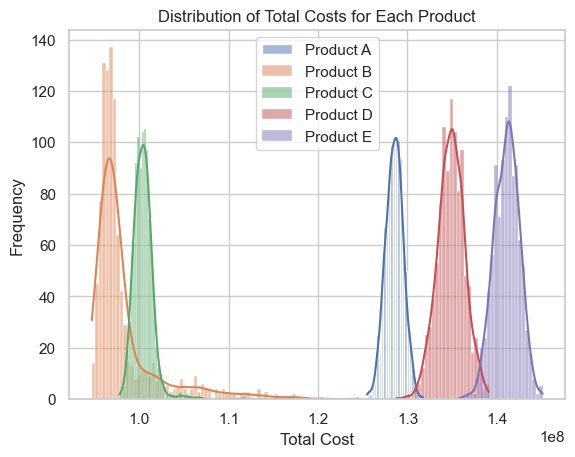

In [20]:
# Plotting the distribution of total costs for each product
sns.set(style="whitegrid")
for product in products:
    sns.histplot(results_df[results_df['Product'] == product]['Total Cost'], kde=True, label=product)

plt.title('Distribution of Total Costs for Each Product')
plt.xlabel('Total Cost')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [21]:
pip show stockpyl


Name: stockpylNote: you may need to restart the kernel to use updated packages.

Version: 1.0.0
Summary: A Python package for inventory optimization and simulation
Home-page: https://github.com/LarrySnyder/stockpyl
Author: Larry Snyder
Author-email: larry.snyder@lehigh.edu
License: GNU General Public License v3 (GPLv3)
Location: C:\Users\js031\anaconda3\Lib\site-packages
Requires: build, jsonpickle, matplotlib, networkx, numpy, scipy, setuptools, sphinx, sphinx-rtd-theme, sphinx-toolbox, tabulate, tqdm
Required-by: 


In [22]:
!pip install stockpyl

AttributeError: module 'stockpyl' has no attribute 'InventorySystem'